# Heart Disease UCI

## Context

One person dies every 36 seconds in the United States from cardiovascular disease. About 655,000 Americans die from heart disease each year—that's 1 in every 4 deaths. Heart disease costs the United States about $219 billion each year from 2014 to 2015.

Imagine if we can predict when someone could be desenvolve some disease, with treatment anticipated, the paciente had more chance to survive that disease.

This database contains 76 attributes, but all published experiments refer to using a subset of 14 of them. In particular, the Cleveland database is the only one that has been used by ML researchers to 
this date. The "goal" field refers to the presence of heart disease in the patient. It is integer valued from 0 (no presence) to 4.

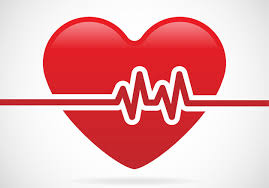

## Content


Attribute Information:

Data contains; 

• age - age in years 

• sex - (1 = male; 0 = female) 

• cp - chest pain type 

• trestbps - resting blood pressure (in mm Hg on admission to the hospital) 

• chol - serum cholestoral in mg/dl 

• fbs - (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false) 

• restecg - resting electrocardiographic results 

• thalach - maximum heart rate achieved 

• exang - exercise induced angina (1 = yes; 0 = no) 

• oldpeak - ST depression induced by exercise relative to rest 

• slope - the slope of the peak exercise ST segment 

• ca - number of major vessels (0-3) colored by flourosopy 

• thal - 3 = normal; 6 = fixed defect; 7 = reversable defect 

• target - have disease or not (1=yes, 0=no)

## Objective

Develop a machine learning model to predict whether someone has heart disease or not, the accuracy must be at least more than 90% verification, as we are dealing with human lives.

# Import Library

In [1]:
!pip install yellowbrick

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.model_selection import train_test_split,GridSearchCV,cross_val_score
from sklearn.metrics import classification_report,confusion_matrix
from yellowbrick.classifier import ConfusionMatrix
from sklearn.metrics import plot_confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC

#from imblearn.over_sampling import SMOTE
#from imblearn.under_sampling import NearMiss

# Loading Dataset

In [3]:
df = pd.read_csv('heart.csv')

In [4]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [6]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


# Exploratory Analytcs

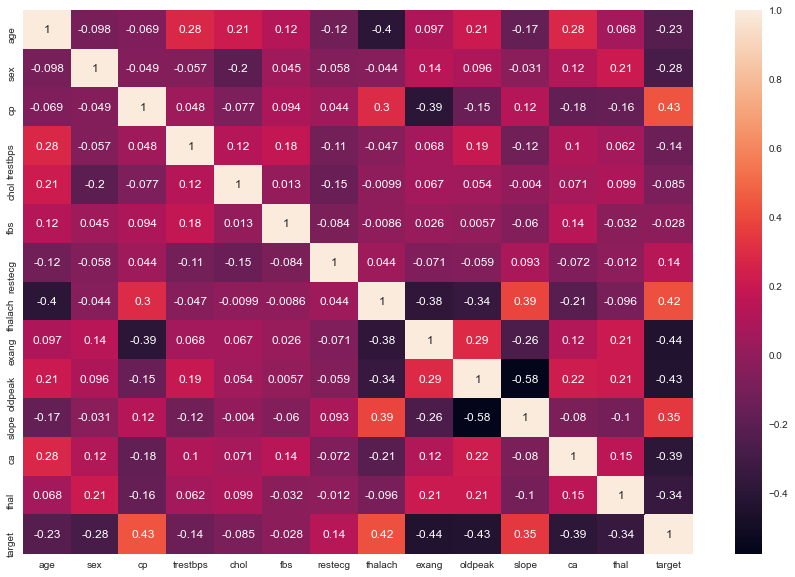

In [7]:
plt.figure(figsize=(15,10))
sns.heatmap(df.corr(),annot=True)

In [8]:
df.groupby('target').mean()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
target,,,,,,,,,,,,,
0,56.601449,0.826087,0.478261,134.398551,251.086957,0.159420,0.449275,139.101449,0.550725,1.585507,1.166667,1.166667,2.543478
1,52.496970,0.563636,1.375758,129.303030,242.230303,0.139394,0.593939,158.466667,0.139394,0.583030,1.593939,0.363636,2.121212


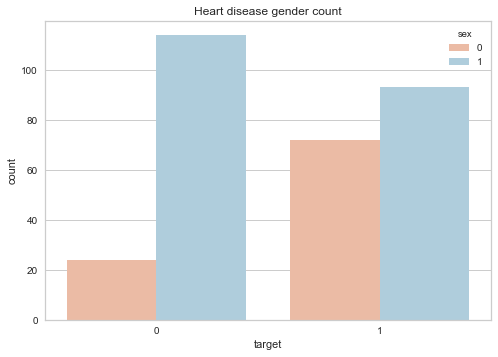

 1 = Who has heart disease 
 0 = Who dosen't have heart disease 

Despite there is more Men (207) than Women (96) in Dataset, 
 the number of patients with heart disease is very similar

 According to Dataset:
45 percent of men have heart disease
75 percent of women have heart disease


In [9]:
sns.countplot('target',hue='sex',data=df,palette='RdBu')
plt.title('Heart disease gender count')
plt.show()
man = len(df[df['sex']==1])
wom = len(df[df['sex']==0])

print(" 1 = Who has heart disease \n 0 = Who dosen't have heart disease \n")
print('Despite there is more Men ({}) than Women ({}) in Dataset, \n the number of patients with heart disease is very similar'.format(man,wom))

man_d = len(df[df['sex']==1][df['target']==1])
man_d_perc = round(man_d*100/man)
wom_d = len(df[df['sex']==0][df['target']==1])
wom_d_perc = round(wom_d*100/wom)

print('\n According to Dataset:')
print('{} percent of men have heart disease'.format(man_d_perc))
print('{} percent of women have heart disease'.format(wom_d_perc))

Mean age of patients with heart disease 52
Mean age of patients without heart disease 57


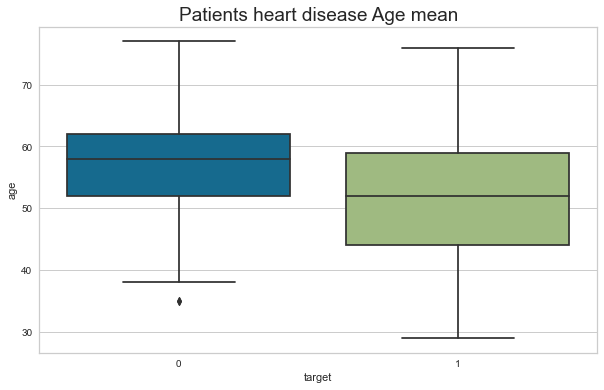

In [10]:
plt.figure(figsize=(10,6))
sns.boxplot('target','age',data=df)
plt.title('Patients heart disease Age mean',size=19)

no = round(np.mean(df[df['target']==0]['age']))
yes = round(np.mean(df[df['target']==1]['age']))
print('Mean age of patients with heart disease',yes)
print('Mean age of patients without heart disease',no)

plt.show()

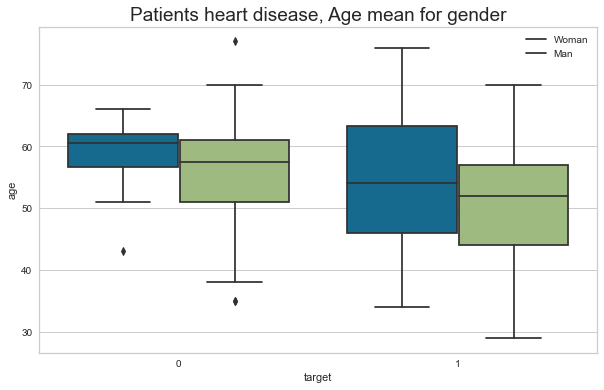

We can observe that, women can have heart disease whatever the age,
 however be more frequentely after forty years old, 
 but in the old lady (around 60 years of age) the probability of 
 having the disease decreases considerably.


In [11]:
try:
    plt.figure(figsize=(10,6))
    sns.boxplot('target','age',hue='sex',data=df)
    plt.title('Patients heart disease, Age mean for gender',size=19)
    #plt.xticks(rotation = 0)
    plt.legend(["Woman","Man"])#,label ='Inline label')
    plt.show()
    print('We can observe that, women can have heart disease whatever the age,\n however be more frequentely after forty years old, \n but in the old lady (around 60 years of age) the probability of \n having the disease decreases considerably.')
except TypeError:
    pass

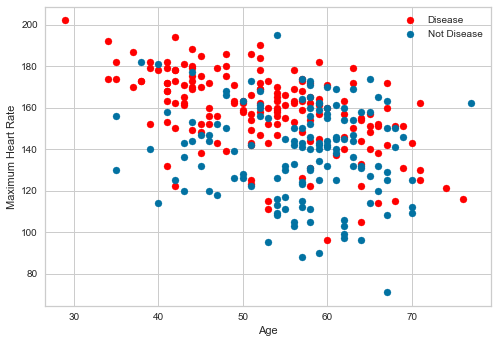

In [12]:
plt.scatter(x=df.age[df.target==1], y=df.thalach[(df.target==1)], c="red")
plt.scatter(x=df.age[df.target==0], y=df.thalach[(df.target==0)])
plt.legend(["Disease", "Not Disease"])
plt.xlabel("Age")
plt.ylabel("Maximum Heart Rate")
plt.show()

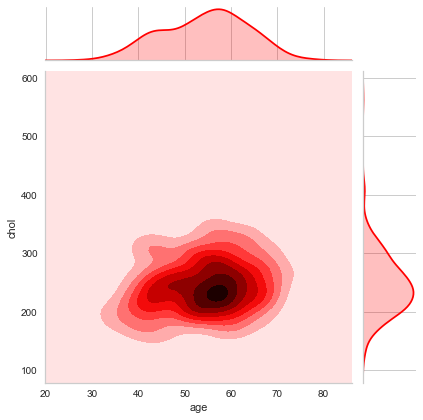

In [13]:
# Analityc relacionship of Age X Chol
sns.jointplot(x='age',y='chol',data=df,kind='kde',color='red')
plt.show()

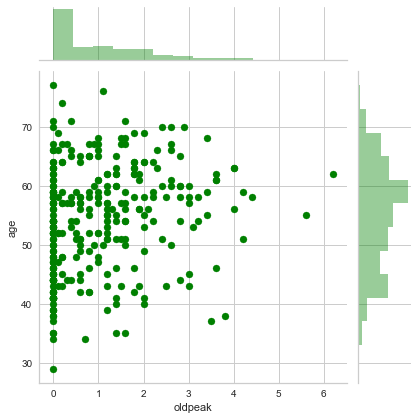

In [14]:
# Analisando relacao Tempo Medio Gasto no Site x Média do Consumidor por dia Gasta na internet
sns.jointplot(x='oldpeak',y='age',data=df,color='green')
plt.show()

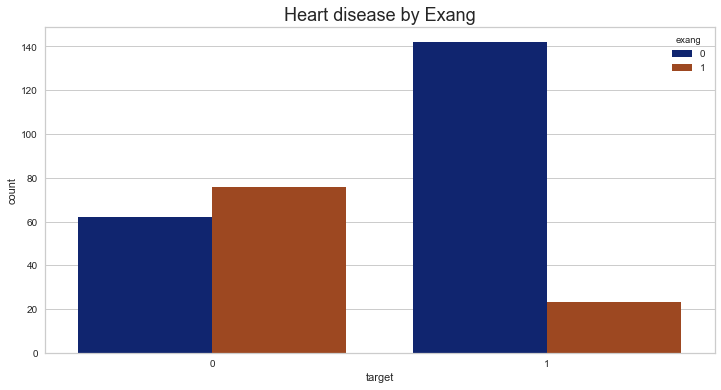

In [15]:
plt.figure(figsize=(12,6))
sns.countplot('target',hue='exang',data=df,palette='dark')
plt.title('Heart disease by Exang',size=18)
plt.show()

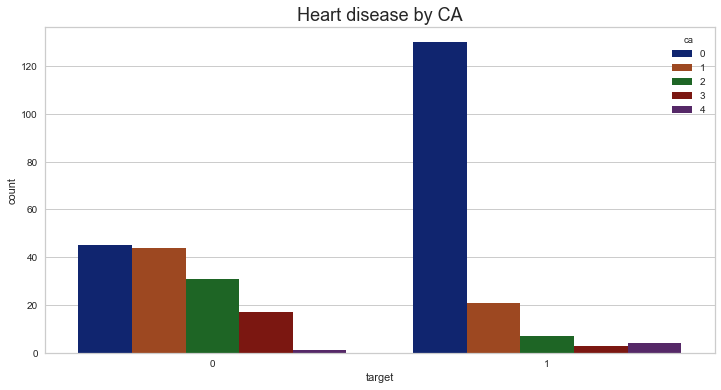

In [16]:
plt.figure(figsize=(12,6))
sns.countplot('target',hue='ca',data=df,palette='dark')
plt.title('Heart disease by CA',size=18)
plt.show()

## Building the Model

I will test the KNN model and the random forest model, to find the best among them for this data set.

At First I will use Standard Scaler in my data, the StandardScaler acts on the columns, but its method is different since it subtracts the column average from the value in question and divides the result by the standard deviation. In the end we have a data distribution with standard deviation equal to 1 and variance of 1 as well.

In [17]:
# First of all, split dataset
x = df.drop('target',axis=1)
y = df['target']
x_train,x_test,y_train,y_test = train_test_split(x,y,
                                              test_size=0.2,random_state=111)
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.fit_transform(x_test)

In [18]:
# Let's created a Random Forest Model
rfc = RandomForestClassifier(n_estimators=1500)
rfc.fit(x_train,y_train)

RandomForestClassifier(n_estimators=1500)

In [19]:
predict = rfc.predict(x_test)
print(confusion_matrix(y_test,predict))
print(classification_report(y_test,predict))

[[19  3]
 [ 4 35]]
              precision    recall  f1-score   support

           0       0.83      0.86      0.84        22
           1       0.92      0.90      0.91        39

    accuracy                           0.89        61
   macro avg       0.87      0.88      0.88        61
weighted avg       0.89      0.89      0.89        61



In [20]:
# Created a KNN Model
knn_test = KNeighborsClassifier(n_neighbors = 7)  # n_neighbors = K Number
knn_test.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=7)

In [21]:
predict = knn_test.predict(x_test)
print(confusion_matrix(y_test,predict))
print(classification_report(y_test,predict))

[[20  2]
 [ 8 31]]
              precision    recall  f1-score   support

           0       0.71      0.91      0.80        22
           1       0.94      0.79      0.86        39

    accuracy                           0.84        61
   macro avg       0.83      0.85      0.83        61
weighted avg       0.86      0.84      0.84        61



However, a random value for K was used, we can tune the model, seeing the best values for it, using the "Metodo Curva de Cotovelo" in portuguese, as shown below.

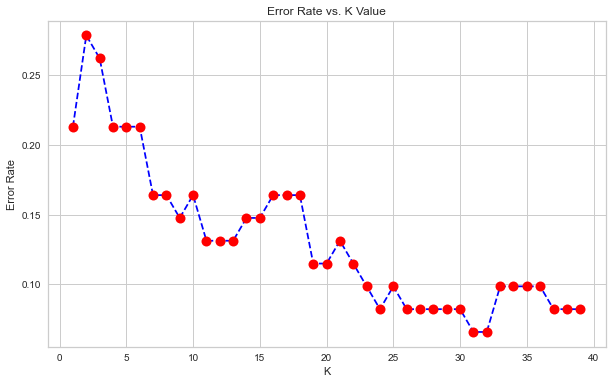

In [22]:
# Create a Score List, to append values. 
error_rate = []
    
# Range K 
for i in range(1,40):
    
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(x_train,y_train)
    pred_i = knn.predict(x_test)
    error_rate.append(np.mean(pred_i != y_test))

# Ploting K Values
plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')
plt.show()

In [23]:
# Now we must recreate the KNN Model, using de Best Score
knn = KNeighborsClassifier(n_neighbors = 31)  # n_neighbors = K Number
knn.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=31)

In [24]:
predict = knn.predict(x_test)
print(confusion_matrix(y_test,predict))
print(classification_report(y_test,predict))

[[20  2]
 [ 2 37]]
              precision    recall  f1-score   support

           0       0.91      0.91      0.91        22
           1       0.95      0.95      0.95        39

    accuracy                           0.93        61
   macro avg       0.93      0.93      0.93        61
weighted avg       0.93      0.93      0.93        61



## Comparing Metrics

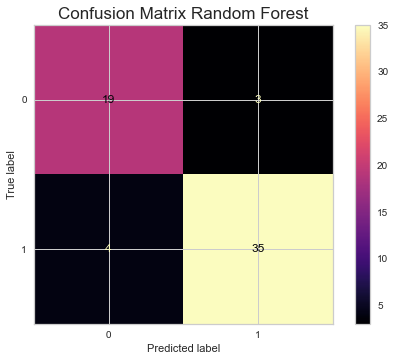

We can see a good model, close to 90% accuracy.


In [25]:
# Using Random Forest
plot_confusion_matrix(rfc, x_test, y_test,values_format='d',cmap='magma')
plt.title('Confusion Matrix Random Forest',size=17)
plt.show()
print('We can see a good model, close to 90% accuracy.')

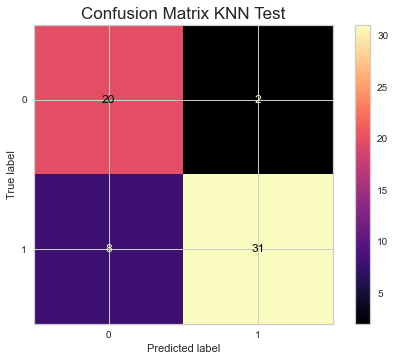

Now, we can see a medium model, a model close to 80% accuracy, not good when we thinking about human lives


In [26]:
plot_confusion_matrix(knn_test, x_test, y_test,values_format='d',cmap='magma')
plt.title('Confusion Matrix KNN Test',size=17)
plt.show()
print('Now, we can see a medium model, a model close to 80% accuracy, not good when we thinking about human lives')

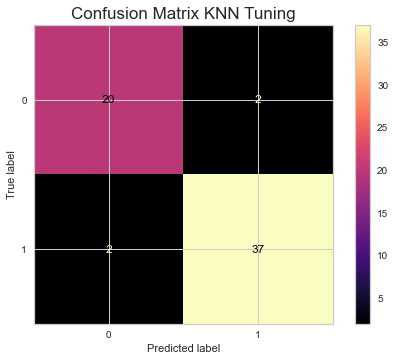

Very good Machine Learning Model, more than 90% of accuracy, becoming a usable model.


In [27]:
plot_confusion_matrix(knn, x_test, y_test,values_format='d',cmap='magma')
plt.title('Confusion Matrix KNN Tuning',size=17)
plt.show()
print('Very good Machine Learning Model, more than 90% of accuracy, becoming a usable model.')

# Conclusion

We can see the importance of the "Elbow curve method" in Portuguese, transforming an average model into a very good one;

The objective was achieved, the model reaches more than 93% accuracy and impressive over 90% in all parameters, becoming a model that could be put to use;

With the "Elbow curve" we can see the ideal value for K, to decrease the maximum of Error Rate, an extremely necessary and precious method that we must whenever possible to have in our favor.